In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import cv2
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

## Create Label Variable

In [3]:
labels = os.listdir(r"/content/drive/MyDrive/DrowsiScan/train/data")

In [4]:
labels
#Show label and create labels variable

['yawn', 'Open', 'Closed', 'no_yawn']

## Show a random image

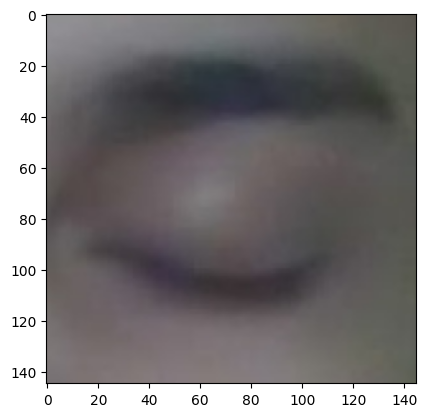

In [5]:
import matplotlib.pyplot as plt
plt.imshow(plt.imread(r"/content/drive/MyDrive/DrowsiScan/train/data/Closed/_3.jpg"))

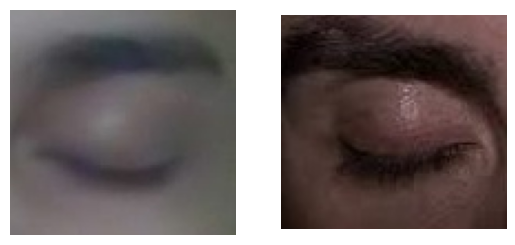

In [6]:


# Load and display multiple images
image_paths = [r"/content/drive/MyDrive/DrowsiScan/train/data/Closed/_3.jpg", r"/content/drive/MyDrive/DrowsiScan/train/data/Closed/_20.jpg"]

num_images = len(image_paths)
fig, axes = plt.subplots(1, num_images)

for i, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    axes[i].imshow(image)
    axes[i].axis('off')

plt.show()

## Create a and show Image array

In [7]:
a = plt.imread(r"/content/drive/MyDrive/DrowsiScan/train/data/yawn/10.jpg")

## Image shape

In [9]:
a.shape

(480, 640, 3)

## Display the image of a yawning face without the background, using the array representation of the face image.


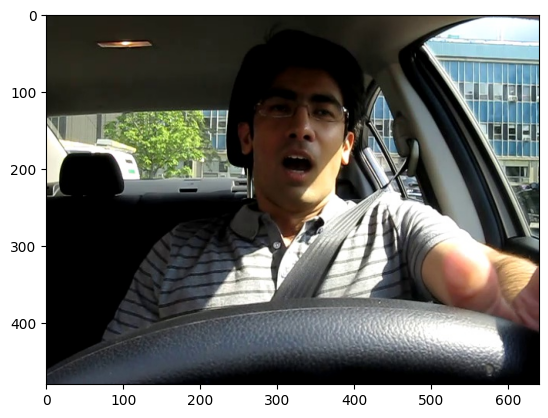

In [10]:
plt.imshow(plt.imread(r"/content/drive/MyDrive/DrowsiScan/train/data/yawn/59.jpg"))

## Extract only the face region from both yawn and not_yawn images.

In [11]:
def face_for_yawn(direc=r"/content/drive/MyDrive/DrowsiScan/train/data", face_cas_path=r"/content/drive/MyDrive/DrowsiScan/model/haarcascade/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    face_cascade = cv2.CascadeClassifier(face_cas_path)

    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            try:
                image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
                faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
                for (x, y, w, h) in faces:
                    roi_color = image_array[y:y+h, x:x+w]
                    resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                    yaw_no.append([resized_array, class_num1])
            except Exception as e:
                print(f"Error processing image {image}: {e}")

    return yaw_no

LIPS DETECTION

In [5]:
!pip install tensorflow
!pip install opencv-python
from tensorflow import keras
import cv2 # Import the cv2 module
import numpy as np
from keras.models import load_model  # Import the load_model function

# Step 1: Load the trained lips detection model

# Load the model
lips_model = load_model("/content/drive/MyDrive/DrowsiScan/model/haarcascade/lips_detection_model.h5")

# ... rest of your code ...

def preprocess_lips(image):
    """Preprocess lips image for classification."""
    image = cv2.resize(image, (64, 64))
    image = image.astype("float32") / 255.0  # Normalize
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

def detect_yawn(frame, lips_roi):
    """Detect yawning using CNN and MAR."""
    processed_lips = preprocess_lips(lips_roi)
    prediction = lips_model.predict(processed_lips)[0][0]

    # If probability > 0.5, classify as 'yawn'
    return prediction > 0.5

# Step 2: Integrate Yawning Detection with Face and Eye Detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/DrowsiScan/model/haarcascade/haarcascade_frontalface_default.xml')
left_eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/DrowsiScan/model/haarcascade/haarcascade_lefteye_2splits.xml')
right_eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/drive/MyDrive/DrowsiScan/model/haarcascade/haarcascade_righteye_2splits.xml')
cap = cv2.VideoCapture(0)
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]

        eyes = eye_cascade.detectMultiScale(roi_gray)

        # Extract lips ROI (adjust coordinates as needed)
        lips_roi = roi_color[int(h*0.6):h, int(w*0.2):int(w*0.8)]

        # Detect yawning
        yawning_detected = detect_yawn(frame, lips_roi)
        if yawning_detected:
            print("Drowsiness Alert: Yawning detected!")

    cv2.imshow("Frame", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## For Closed and Open eye

In [6]:
def get_data(dir_path=r"/content/drive/MyDrive/DrowsiScan/train/data"):
    labels = ['Closed', 'Open']
    IMG_SIZE = 145
    data = []

    for label in labels:
        path = os.path.join(dir_path, label)
        class_num = labels.index(label) + 2
        print(class_num)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                data.append([resized_array, class_num])
            except Exception as e:
                print(f"Error processing image {img}: {e}")

    return data

## Expand the dataset by adding more data and convert the data into an array format.

In [7]:
def append_data():
    yaw_no = face_for_yawn()
    data = get_data()
    yaw_no.extend(data)

    # Ensure all images and labels are correctly formatted
    images = []
    labels = []

    for item in yaw_no:
        images.append(item[0])
        labels.append(item[1])

    return np.array(images), np.array(labels)

## New variable to store

In [13]:
# Add this function definition to the top of the ipython-input-7-0296b4c64c51 file, or to a cell that will be executed before this one.

import cv2
import os
import numpy as np

def face_for_yawn(direc=r"/content/drive/MyDrive/DrowsiScan/train/data/lips", face_cas_path=r"/content/drive/MyDrive/DrowsiScan/model/haarcascade/haarcascade_frontalface_default.xml"):
    yaw_no = []
    IMG_SIZE = 145
    categories = ["yawn", "no_yawn"]
    face_cascade = cv2.CascadeClassifier(face_cas_path)

    for category in categories:
        path_link = os.path.join(direc, category)
        class_num1 = categories.index(category)
        print(class_num1)
        for image in os.listdir(path_link):
            try:
                image_array = cv2.imread(os.path.join(path_link, image), cv2.IMREAD_COLOR)
                faces = face_cascade.detectMultiScale(image_array, 1.3, 5)
                for (x, y, w, h) in faces:
                    roi_color = image_array[y:y+h, x:x+w]
                    resized_array = cv2.resize(roi_color, (IMG_SIZE, IMG_SIZE))
                    yaw_no.append([resized_array, class_num1])
            except Exception as e:
                print(f"Error processing image {image}: {e}")

    return yaw_no

In [14]:
new_images, new_labels = append_data()
print("Data shape:", new_images.shape, new_labels.shape)

0
1
2
3
Data shape: (1925, 145, 145, 3) (1925,)


## Separate the labels and features in the dataset

## Reshape images X

In [15]:
X = np.array(new_images)
X = X.reshape(-1, 145, 145, 3)

In [16]:
X.shape

(1925, 145, 145, 3)

## Perform label binarization.

In [17]:
from sklearn.preprocessing import LabelBinarizer
label_bin = LabelBinarizer()
y = label_bin.fit_transform(new_labels)

## Label array

In [18]:
y = np.array(y)

In [19]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

## Train Test split

In [20]:
from sklearn.model_selection import train_test_split
seed = 42
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed, test_size=test_size)

## Length of X_test

In [21]:
len(X_test)

578

## Import some dependencies

In [22]:
from tensorflow.python.keras.layers import Lambda, Dropout
from tensorflow.python.keras.layers.advanced_activations import ELU, LeakyReLU, ReLU
from tensorflow.python.keras import activations
from keras import callbacks, layers, metrics, regularizers
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Activation,SimpleRNN
import cv2
import os
import numpy as np
import pandas as pd
import pickle


## Data Augmentation

In [23]:
train_generator = ImageDataGenerator(rescale=1/255, zoom_range=0.2, horizontal_flip=True, rotation_range=30)
test_generator = ImageDataGenerator(rescale=1/255)


#train_generator = tf.data.Dataset.from_tensor_slices((X_train, y_train))
#test_generator = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_generator = train_generator.flow(np.array(X_train), y_train, shuffle=False)
test_generator = test_generator.flow(np.array(X_test), y_test, shuffle=False)

# Build and train CNN model

In [24]:
model_CNN = keras.models.Sequential()

model_CNN.add(Conv2D(filters= 256, kernel_size=(3, 3), activation="relu", input_shape=(145,145,3)))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Conv2D(filters= 128, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Conv2D(filters= 64, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(Conv2D(filters= 32, kernel_size= (3, 3), activation="relu",kernel_initializer='he_normal'))
model_CNN.add(BatchNormalization())
model_CNN.add(MaxPooling2D(pool_size=(2, 2)))

model_CNN.add(keras.layers.Flatten())
model_CNN.add(BatchNormalization())
model_CNN.add(Dropout(0.5))

model_CNN.add(keras.layers.Dense(64, activation="relu"))
model_CNN.add(keras.layers.Dense(4, activation="softmax"))

model_CNN.build(input_shape=(None, 145, 145, 3))
model_CNN.summary()

model_CNN.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 143, 143, 256)       │           7,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 143, 143, 256)       │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 71, 71, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 69, 69, 128)         │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 69, 69, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 34, 34, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 32, 32, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 32, 32, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 1568)                │           6,272 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         100,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 503,332 (1.92 MB)

 Trainable params: 499,236 (1.90 MB)

 Non-trainable params: 4,096 (16.00 KB)

In [25]:
# Add Callback
# early_stopping = tf.keras.callbacks.EarlyStopping(
#     monitor='val_loss', mode='min', patience=5, verbose=1)
mcp_save = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/DrowsiScan/train/history_and_model/best_model_CNN.h5', save_best_only=True, monitor='val_loss', mode='min')
callbacks = [mcp_save]

In [26]:
history_CNN = model_CNN.fit(train_generator, epochs=50, validation_data=test_generator, shuffle=True, validation_steps=len(test_generator), callbacks=callbacks)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.5750 - loss: 1.1397

43/43 ━━━━━━━━━━━━━━━━━━━━ 40s 516ms/step - accuracy: 0.5779 - loss: 1.1317 - val_accuracy: 0.6332 - val_loss: 0.9686
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.8477 - loss: 0.4610 - val_accuracy: 0.3720 - val_loss: 1.7056
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 21s 256ms/step - accuracy: 0.8609 - loss: 0.3674 - val_accuracy: 0.3720 - val_loss: 2.6872
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 250ms/step - accuracy: 0.8752 - loss: 0.3484 - val_accuracy: 0.3720 - val_loss: 2.5529
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 217ms/step - accuracy: 0.8864 - loss: 0.3102 - val_accuracy: 0.3927 - val_loss: 1.9680
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 251ms/step - accuracy: 0.8952 - loss: 0.2615 - val_accuracy: 0.3720 - val_loss: 2.5767
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 252ms/step - accuracy: 0.8992 - loss: 0.2600 - val_accuracy: 0.3737 - val_loss: 3.2144
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - accuracy: 0.8856 - loss: 0.2781

43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 243ms/step - accuracy: 0.8857 - loss: 0.2785 - val_accuracy: 0.7734 - val_loss: 0.6053
Epoch 9/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.9155 - loss: 0.2342 - val_accuracy: 0.7422 - val_loss: 0.6994
Epoch 10/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.9118 - loss: 0.1909 - val_accuracy: 0.7422 - val_loss: 0.6058
Epoch 11/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step - accuracy: 0.9310 - loss: 0.1832

43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 261ms/step - accuracy: 0.9306 - loss: 0.1842 - val_accuracy: 0.8339 - val_loss: 0.4098
Epoch 12/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step - accuracy: 0.9012 - loss: 0.2348

43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.9013 - loss: 0.2347 - val_accuracy: 0.8356 - val_loss: 0.3710
Epoch 13/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.9310 - loss: 0.1860

43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.9308 - loss: 0.1860 - val_accuracy: 0.9239 - val_loss: 0.2113
Epoch 14/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 253ms/step - accuracy: 0.9329 - loss: 0.1756 - val_accuracy: 0.8979 - val_loss: 0.2469
Epoch 15/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.9238 - loss: 0.1771 - val_accuracy: 0.8962 - val_loss: 0.2387
Epoch 16/50
42/43 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.9265 - loss: 0.1774

43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 228ms/step - accuracy: 0.9267 - loss: 0.1771 - val_accuracy: 0.9204 - val_loss: 0.1797
Epoch 17/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 229ms/step - accuracy: 0.9532 - loss: 0.1253 - val_accuracy: 0.9325 - val_loss: 0.1828
Epoch 18/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9503 - loss: 0.1275

43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.9503 - loss: 0.1276 - val_accuracy: 0.9464 - val_loss: 0.1452
Epoch 19/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step - accuracy: 0.9385 - loss: 0.1512

43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 251ms/step - accuracy: 0.9385 - loss: 0.1512 - val_accuracy: 0.9377 - val_loss: 0.1371
Epoch 20/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 213ms/step - accuracy: 0.9474 - loss: 0.1441 - val_accuracy: 0.9412 - val_loss: 0.1469
Epoch 21/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 244ms/step - accuracy: 0.9374 - loss: 0.1539 - val_accuracy: 0.9412 - val_loss: 0.1412
Epoch 22/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 236ms/step - accuracy: 0.9436 - loss: 0.1486

43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.9435 - loss: 0.1486 - val_accuracy: 0.9360 - val_loss: 0.1368
Epoch 23/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - accuracy: 0.9479 - loss: 0.1440

43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.9478 - loss: 0.1440 - val_accuracy: 0.9464 - val_loss: 0.1199
Epoch 24/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step - accuracy: 0.9227 - loss: 0.1697 - val_accuracy: 0.8945 - val_loss: 0.2622
Epoch 25/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.9530 - loss: 0.1214 - val_accuracy: 0.9550 - val_loss: 0.1357
Epoch 26/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 249ms/step - accuracy: 0.9653 - loss: 0.1006 - val_accuracy: 0.9412 - val_loss: 0.1383
Epoch 27/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 248ms/step - accuracy: 0.9564 - loss: 0.1083 - val_accuracy: 0.9446 - val_loss: 0.1406
Epoch 28/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 212ms/step - accuracy: 0.9456 - loss: 0.1302 - val_accuracy: 0.9429 - val_loss: 0.1549
Epoch 29/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.9613 - loss: 0.0914 - val_accuracy: 0.9567 - val_loss: 0.1247
Epoch 30/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - accuracy: 0.9609 - loss: 0.0931 - val_accuracy: 

43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 264ms/step - accuracy: 0.9588 - loss: 0.0966 - val_accuracy: 0.9498 - val_loss: 0.1137
Epoch 37/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.9548 - loss: 0.0987

43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 255ms/step - accuracy: 0.9549 - loss: 0.0988 - val_accuracy: 0.9654 - val_loss: 0.1037
Epoch 38/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - accuracy: 0.9618 - loss: 0.0898 - val_accuracy: 0.9637 - val_loss: 0.1143
Epoch 39/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 209ms/step - accuracy: 0.9655 - loss: 0.0932 - val_accuracy: 0.9671 - val_loss: 0.1102
Epoch 40/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 235ms/step - accuracy: 0.9547 - loss: 0.1098 - val_accuracy: 0.9498 - val_loss: 0.1095
Epoch 41/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 230ms/step - accuracy: 0.9629 - loss: 0.0932 - val_accuracy: 0.9204 - val_loss: 0.2016
Epoch 42/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 199ms/step - accuracy: 0.9715 - loss: 0.0734 - val_accuracy: 0.9481 - val_loss: 0.1422
Epoch 43/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step - accuracy: 0.9638 - loss: 0.0772

43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 245ms/step - accuracy: 0.9637 - loss: 0.0774 - val_accuracy: 0.9619 - val_loss: 0.0996
Epoch 44/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - accuracy: 0.9637 - loss: 0.0800 - val_accuracy: 0.9429 - val_loss: 0.1301
Epoch 45/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 204ms/step - accuracy: 0.9647 - loss: 0.0885 - val_accuracy: 0.9187 - val_loss: 0.2037
Epoch 46/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 222ms/step - accuracy: 0.9678 - loss: 0.0721 - val_accuracy: 0.9602 - val_loss: 0.1117
Epoch 47/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - accuracy: 0.9642 - loss: 0.0735 - val_accuracy: 0.9637 - val_loss: 0.1099
Epoch 48/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 9s 215ms/step - accuracy: 0.9744 - loss: 0.0663 - val_accuracy: 0.9498 - val_loss: 0.1154
Epoch 49/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.9721 - loss: 0.0787 - val_accuracy: 0.9066 - val_loss: 0.3049
Epoch 50/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 10s 231ms/step - accuracy: 0.9752 - loss: 0.0746 - val_accuracy: 

In [27]:
model_CNN.save('/content/drive/MyDrive/DrowsiScan/train/history_and_model/last_model_CNN.h5')
with open('/content/drive/MyDrive/DrowsiScan/train/history_and_model/history_CNN_RNN.pkl', 'wb') as file_pi:
    pickle.dump(history_CNN.history, file_pi)

## Comapare accuracy and loss on train and val set

CNN Training Accuracy:  [0.6985894441604614, 0.8433555960655212, 0.8574610352516174, 0.8804751038551331, 0.8775055408477783, 0.885671854019165, 0.902746856212616, 0.8871566653251648, 0.9175946712493896, 0.9131402969360352, 0.9138826727867126, 0.9064587950706482, 0.9220489859580994, 0.9324424862861633, 0.9213066101074219, 0.9317000508308411, 0.9391239881515503, 0.948775053024292, 0.9383816123008728, 0.9428359270095825, 0.9346696138381958, 0.942093551158905, 0.94357830286026, 0.9309576749801636, 0.9547141790390015, 0.9599109292030334, 0.9547141790390015, 0.9465478658676147, 0.953971803188324, 0.955456554889679, 0.953971803188324, 0.9524869918823242, 0.9547141790390015, 0.9561989903450012, 0.9584261178970337, 0.955456554889679, 0.955456554889679, 0.9636228680610657, 0.9643652439117432, 0.9599109292030334, 0.9636228680610657, 0.9695619940757751, 0.9606533050537109, 0.9643652439117432, 0.9628804922103882, 0.9628804922103882, 0.9665924310684204, 0.9732739329338074, 0.9784706830978394, 0.9680

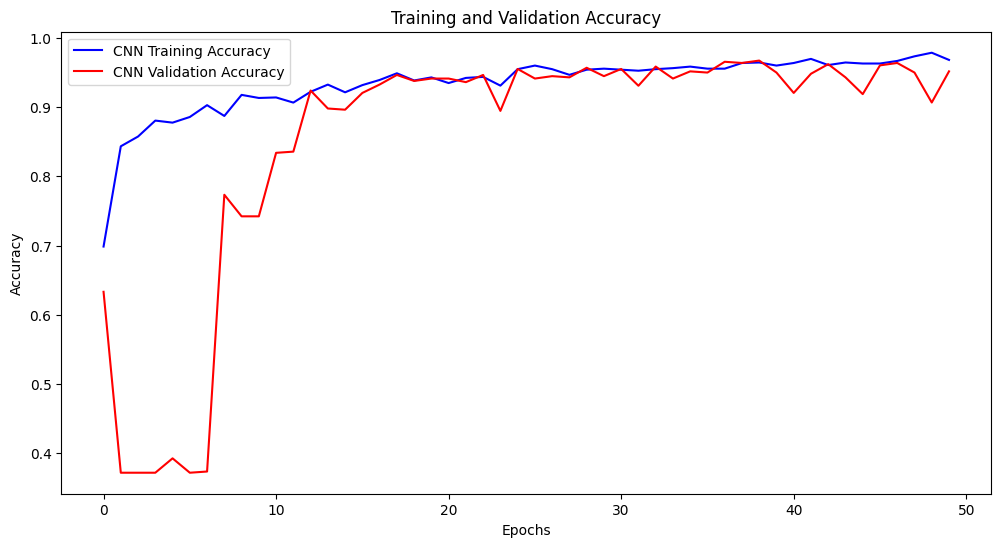

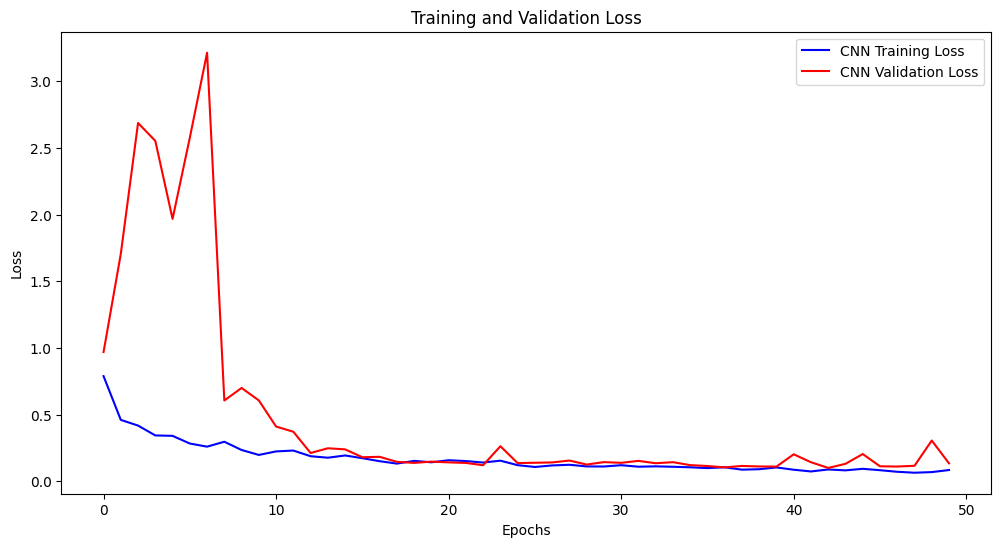

In [32]:
import matplotlib.pyplot as plt

# Extract metrics from history using dot notation
accuracy_CNN = history_CNN.history['accuracy']
val_accuracy_CNN = history_CNN.history['val_accuracy']
loss_CNN = history_CNN.history['loss']
val_loss_CNN = history_CNN.history['val_loss']

# Debug prints to verify lengths and data
print("CNN Training Accuracy: ", accuracy_CNN)
print("CNN Validation Accuracy: ", val_accuracy_CNN)
print("CNN Training Loss: ", loss_CNN)
print("CNN Validation Loss: ", val_loss_CNN)

# Adjust epochs_CNN to match the length of val_accuracy_CNN
epochs_CNN = list(range(len(val_accuracy_CNN)))  # Changed this line

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs_CNN, accuracy_CNN[:len(epochs_CNN)], "b", label="CNN Training Accuracy") # Changed this line
plt.plot(epochs_CNN, val_accuracy_CNN, "r", label="CNN Validation Accuracy")
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(epochs_CNN, loss_CNN[:len(epochs_CNN)], "b", label="CNN Training Loss") # Changed this line
plt.plot(epochs_CNN, val_loss_CNN, "r", label="CNN Validation Loss")
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# classification report

In [33]:
labels_new = ["yawn", "no_yawn", "Closed", "Open"]

In [35]:
import tensorflow as tf

# Load the saved model
best_model_CNN = tf.keras.models.load_model('/content/drive/MyDrive/DrowsiScan/train/history_and_model/best_model_CNN.h5') # Update with the actual path to your model

# Make predictions
predictions_CNN = best_model_CNN.predict(X_test)

# Convert predictions to label indices
predicted_classes_CNN = np.argmax(predictions_CNN, axis=1)

19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step


In [36]:
from sklearn.metrics import classification_report
# Classification report for CNN
print("Classification Report for CNN:\n")
report_CNN = classification_report(np.argmax(y_test, axis=1), predicted_classes_CNN, target_names=labels_new)
print(report_CNN)


Classification Report for CNN:

              precision    recall  f1-score   support

        yawn       0.44      0.95      0.61        63
     no_yawn       0.26      0.08      0.12        74
      Closed       0.94      0.08      0.15       215
        Open       0.54      0.96      0.69       226

    accuracy                           0.52       578
   macro avg       0.55      0.52      0.39       578
weighted avg       0.65      0.52      0.41       578



## Confusion matrix

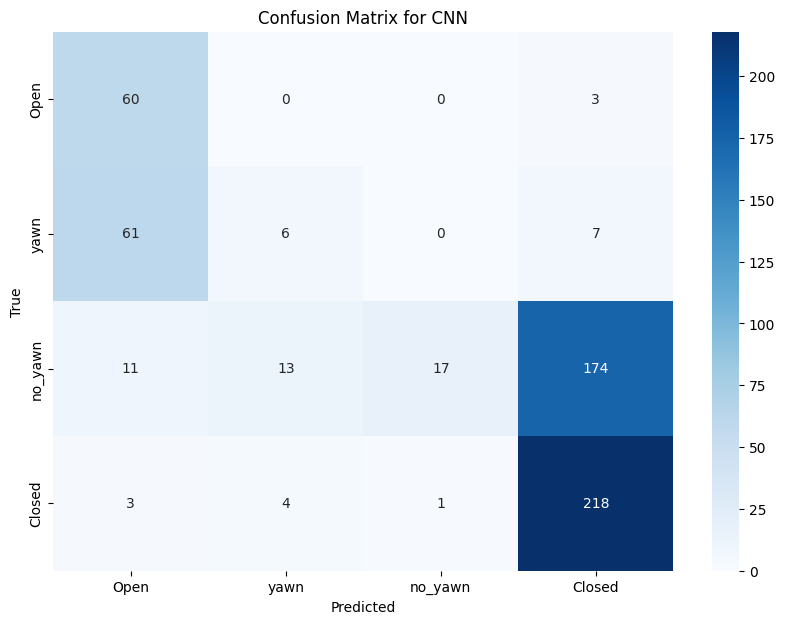

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate confusion matrices
cm_CNN = confusion_matrix(np.argmax(y_test, axis=1), predicted_classes_CNN)

# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, labels_new):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_new, yticklabels=labels_new)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Define class labels
labels_new = [ "Open","yawn", "no_yawn", "Closed",]

# Plot confusion matrices
plot_confusion_matrix(cm_CNN, "Confusion Matrix for CNN", labels_new)
